# Worksheet 18

Name:  Jakob Rundlett
UID: U90161292

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

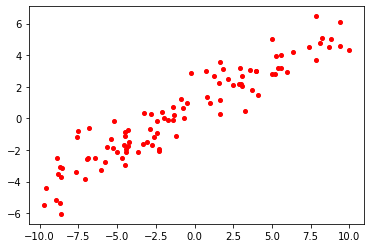

In [10]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

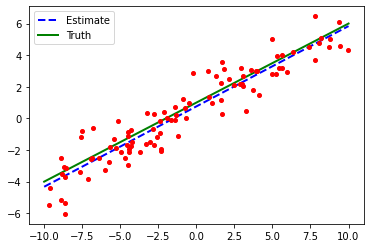

[0.75875308 0.50819816]
[1.  0.5]


In [11]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-10,10,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

print(beta_hat)
print(true_beta)

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

It's very accurate.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

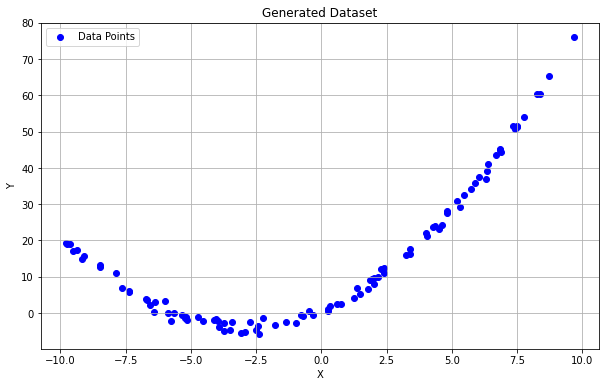

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Number of data points
n = 100

# Generating X values
X = np.random.uniform(-10, 10, n)

# Generating Y values
eps = np.random.normal(0, 1, n)  # Gaussian noise
Y = 1 + 3 * X + 0.5 * X**2 + eps

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.title('Generated Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


e) Plot the least squares estimate line through the scatter plot.

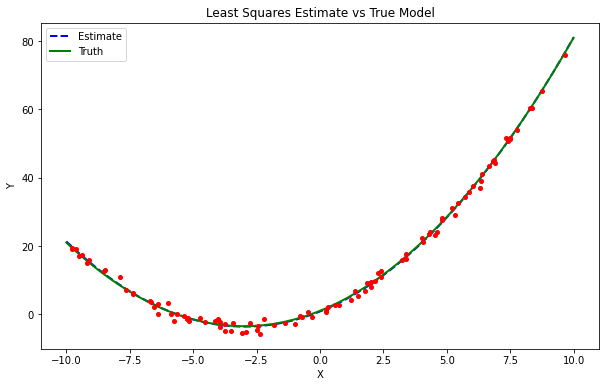

(array([0.79781596, 2.98799645, 0.50412708]), [1, 3, 0.5])

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

# Correcting the provided code snippet to make it work with the existing data

# Assuming x and y are the variables we previously created
x = X
y = Y

# Recalculating beta_hat using the least squares method
intercept = np.ones(np.shape(x)[0])
X_mat = np.array([intercept, x, x**2]).T
beta_hat, _, _, _ = lstsq(X_mat, y, rcond=None)

# Generating values for the plot
x_plot = np.linspace(-10, 10, 50)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot**2

# Assuming true_beta represents the true coefficients of the underlying model
true_beta = [1, 3, 0.5]  # as per the original formula used to generate the data

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_est, 'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot**2, lw=2, c='g', label='Truth')
plt.plot(x, y, 'ro', markersize=4)
plt.legend()
plt.title('Least Squares Estimate vs True Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

beta_hat, true_beta


f) How does the estimate of `beta` compare to the parameters we used to generate the data?

It is very close.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

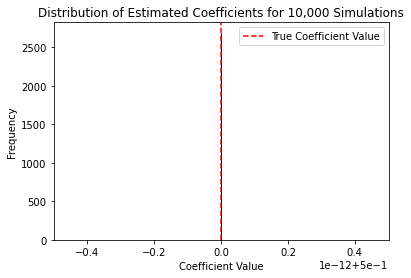

In [15]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100  # You can adjust the sample size as needed
true_beta = np.array([1, 0.5])
betas = []

for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)  # Generating random x values
    y = true_beta[0] + true_beta[1] * x  # Generating y values using the true model

    # Adding an intercept term
    intercept = np.ones(x.shape)
    X = np.array([intercept, x]).T

    # Calculating beta_hat using the normal equation
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    betas.append(beta_hat)

# Convert the list of beta values to a numpy array for easier manipulation
betas_array = np.array(betas)

# Plotting the histogram of the estimated coefficients for x
plt.hist(betas_array[:, 1], bins=100, color='blue', edgecolor='black')
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Coefficient Value')
plt.title('Distribution of Estimated Coefficients for 10,000 Simulations')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()
